Consigna:

**Sistema de recomendación:**

Una vez que toda la data es consumible por la API, está lista para consumir por los departamentos de Analytics y Machine Learning, y nuestro EDA nos permite entender bien los datos a los que tenemos acceso, es hora de entrenar nuestro modelo de machine learning para armar un sistema de recomendación de películas. El EDA debería incluir gráficas interesantes para extraer datos, como por ejemplo una nube de palabras con las palabras más frecuentes en los títulos de las películas. Éste consiste en recomendar películas a los usuarios basándose en películas similares, por lo que se debe encontrar la similitud de puntuación entre esa película y el resto de películas, se ordenarán según el score de similaridad y devolverá una lista de Python con 5 valores, cada uno siendo el string del nombre de las películas con mayor puntaje, en orden descendente. Debe ser deployado como una función adicional de la API anterior y debe llamarse:

def recomendacion( titulo ): Se ingresa el nombre de una película y te recomienda las similares en una lista de 5 valores.


In [ ]:
# Se importan las librerias necesarias
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity


In [ ]:
import matplotlib.pyplot as plt


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel

In [ ]:
from sklearn.metrics.pairwise import pairwise_distances

In [ ]:
# Cargar el archivo .csv en el dataframe
total = pd.read_csv('df_Total.csv', low_memory=False)

In [ ]:
import numpy as np

Dado el tamaño del dataset es recomendable trabajar con una parte del mismo. En este caso se procede a aplicar un "sample" = 10000 datos y almacenar este dataset como df_parte para utilizar siempre la misma muestra.

In [ ]:
#df_parte = df_Total.sample(n=10000)
#df_parte.head()

In [ ]:
# Exportar el df generado
# ruta_archivo = '/content/sample_data/df_parte.csv'

# Exportar el DataFrame a un archivo CSV
# df_Total.to_csv(ruta_archivo, index=False)

# Para leer el archivo CSV y mostrar los datos
# df_exportado = pd.read_csv(ruta_archivo)

In [ ]:
# En caso de haber fraccionado o realizado el sample previamente, este paso se omite.

# Cargar el archivo csv
parte = pd.read_csv('df_parte.csv', low_memory=False)

In [ ]:
parte.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   budget                  10000 non-null  float64
 1   id                      10000 non-null  float64
 2   original_language       9997 non-null   object 
 3   overview                9825 non-null   object 
 4   popularity              10000 non-null  float64
 5   release_date            10000 non-null  object 
 6   revenue                 10000 non-null  float64
 7   runtime                 9961 non-null   float64
 8   spoken_languages        10000 non-null  object 
 9   status                  9991 non-null   object 
 10  title                   10000 non-null  object 
 11  vote_average            10000 non-null  float64
 12  vote_count              10000 non-null  float64
 13  return                  10000 non-null  float64
 14  release_year            10000 non-null 

In [ ]:
# Para trabajar luego sobre la muestra conocemos algunos de sus títulos
# Obtener las primeras 6 filas de la columna "Title"
resultado = parte['title'].head(20)

# Imprimir el resultado
print(resultado)

0                         The Cheap Detective
1     The White Haired Witch of Lunar Kingdom
2                           Carnival of Souls
3                          The Sheltering Sky
4                             Erik the Viking
5                     My Left Eye Sees Ghosts
6                   A One-Way Trip to Antibes
7           Duck Dodgers in the 24½th Century
8                                   Aces High
9                                        Land
10                        My Brother's Keeper
11                                    Aankhen
12              Elite Squad: The Enemy Within
13                             The Mouthpiece
14                                The Recruit
15                                    Rosetta
16                   The 3 Worlds of Gulliver
17                             Deck the Halls
18                                    Zenobia
19                         If I Had a Million
Name: title, dtype: object


Usando la muestra de 10.000 datos es posible realizar el cálculo de las 10 películas mas populares

In [ ]:
C = parte["vote_average"].mean()
m = parte["vote_count"].quantile(0.9)
print("C:", C)
print("m:", m)

new_movies_df = parte.copy().loc[parte["vote_count"] >= m]
print(new_movies_df.shape)

def weighted_rating(x, C=C, m=m):
    v = x["vote_count"]
    R = x["vote_average"]
    return (v / (v + m) * R) + (m / (v + m) * C)

new_movies_df["score"] = new_movies_df.apply(weighted_rating, axis=1)
new_movies_df = new_movies_df.sort_values('score', ascending=False)
print(new_movies_df[["title", "vote_count", "vote_average", "score"]].head(10))

def plot():
    popularity = new_movies_df.sort_values("popularity", ascending=False)
    plt.figure(figsize=(12, 6))
    plt.barh(popularity["title"].head(10), popularity["popularity"].head(10), align="center", color="skyblue")
    plt.gca().invert_yaxis()
    plt.title("Top 10 movies")
    plt.xlabel("Popularity")
    plt.show()

plot()


No obstante, estos resultados cambian si se aplica el mismo código al dataset completo

C: 5.6809478140862195
m: 177.0
(4284, 26)
                             title  vote_count  vote_average     score
311       The Shawshank Redemption      8358.0           8.5  8.441538
816                  The Godfather      6024.0           8.5  8.419534
10163  Dilwale Dulhania Le Jayenge       661.0           9.1  8.377837
12302              The Dark Knight     12269.0           8.3  8.262753
2803                    Fight Club      9678.0           8.3  8.252961
289                   Pulp Fiction      8670.0           8.3  8.247601
517               Schindler's List      4436.0           8.3  8.199507
22840                     Whiplash      4376.0           8.3  8.198183
5409                 Spirited Away      3968.0           8.3  8.188161
2175             Life Is Beautiful      3643.0           8.3  8.178646


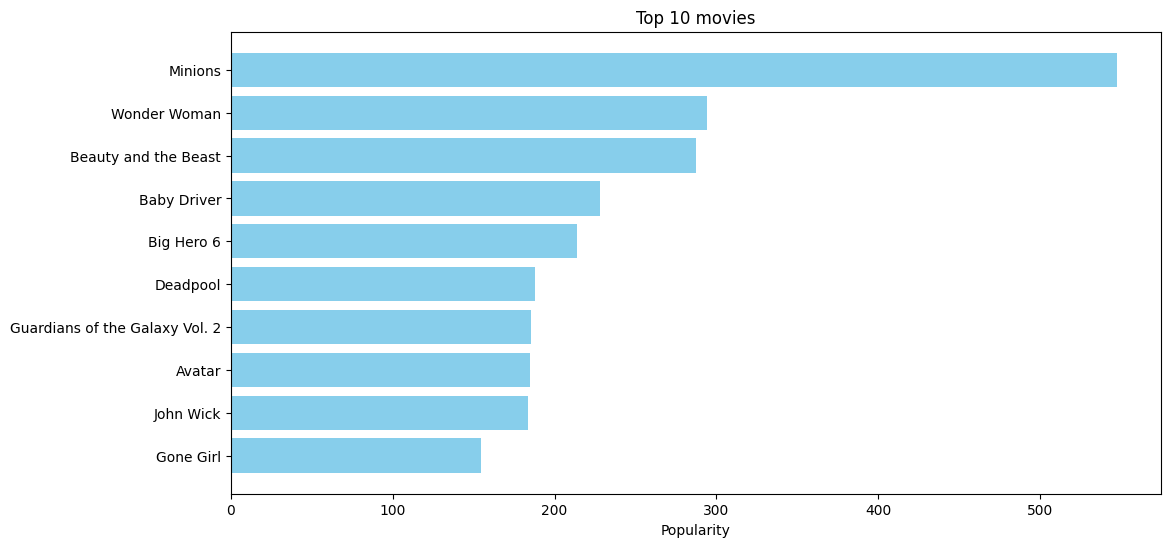

In [ ]:
C = total["vote_average"].mean()
m = total["vote_count"].quantile(0.9)
print("C:", C)
print("m:", m)

new_movies_df = total.copy().loc[total["vote_count"] >= m]
print(new_movies_df.shape)

def weighted_rating(x, C=C, m=m):
    v = x["vote_count"]
    R = x["vote_average"]
    return (v / (v + m) * R) + (m / (v + m) * C)

new_movies_df["score"] = new_movies_df.apply(weighted_rating, axis=1)
new_movies_df = new_movies_df.sort_values('score', ascending=False)
print(new_movies_df[["title", "vote_count", "vote_average", "score"]].head(10))

def plot():
    popularity = new_movies_df.sort_values("popularity", ascending=False)
    plt.figure(figsize=(12, 6))
    plt.barh(popularity["title"].head(10), popularity["popularity"].head(10), align="center", color="skyblue")
    plt.gca().invert_yaxis()
    plt.title("Top 10 movies")
    plt.xlabel("Popularity")
    plt.show()

plot()

Aqui podemos notar que "Minions" tiene el mayor indice de popularidad

# Filtro basado en contenido

En este caso se aplica Cosine_sim
 y  TfidfVectorizer para obtener resultados dentro del df fraccionado



In [ ]:
# Obtener las primeras 6 filas de la columna "Title"
resultado2 = parte['title'].head(30)

# Imprimir el resultado
print(resultado2)

0                         The Cheap Detective
1     The White Haired Witch of Lunar Kingdom
2                           Carnival of Souls
3                          The Sheltering Sky
4                             Erik the Viking
5                     My Left Eye Sees Ghosts
6                   A One-Way Trip to Antibes
7           Duck Dodgers in the 24½th Century
8                                   Aces High
9                                        Land
10                        My Brother's Keeper
11                                    Aankhen
12              Elite Squad: The Enemy Within
13                             The Mouthpiece
14                                The Recruit
15                                    Rosetta
16                   The 3 Worlds of Gulliver
17                             Deck the Halls
18                                    Zenobia
19                         If I Had a Million
20                                Rabbit, Run
21                         Picture

In [ ]:
# Filtro basado en contenido
tfidf = TfidfVectorizer(stop_words="english") #se convierte el texto de la columna "overview" en una representación numérica (TF-IDF)
parte["overview"] = parte["overview"].fillna("") # rellena vacios
tfidf_matrix = tfidf.fit_transform(parte["overview"]) # se genera la matriz

# Similitud
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix) # similitud coseno entre todas las películas basándose en la matriz TF-IDF
# print(cosine_sim.shape) # se puede usar para visualizar la matriz generada hasta aqui

indices = pd.Series(parte.index, index=parte["title"]).drop_duplicates()
print(indices.head())


title
The Cheap Detective                        0
The White Haired Witch of Lunar Kingdom    1
Carnival of Souls                          2
The Sheltering Sky                         3
Erik the Viking                            4
dtype: int64


In [ ]:
def get_recommendations(title, cosine_sim=cosine_sim):
    idx = indices[title]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:11]
    movies_indices = [ind[0] for ind in sim_scores]
    movies = parte["title"].iloc[movies_indices]
    return movies
print("# Contenidos recomendados - plot#")
print()
print("Recomendaciones para Bliss")
print(get_recommendations("Bliss"))
print()
print("Recomendaciones para Erik the Viking")
print(get_recommendations("Erik the Viking"))
print()
print("Recomendaciones para The Cheap Detective")
print(get_recommendations("The Cheap Detective"))

# Contenidos recomendados - plot#

Recomendaciones para Bliss
8198         The River and Death
8085      The Ballad of Narayama
7332    The Price of Forgiveness
7072              The Blue Light
7815       Village of the Damned
4109                   Two Women
2668                       Fluke
249                  Blood Curse
9859      A Wolf from Vesyegonsk
9720                 The Italian
Name: title, dtype: object

Recomendaciones para Erik the Viking
794                                               Details
8422                                Knives of the Avenger
9701                                     Almost Christmas
4097    The Saga of the Viking Women and Their Voyage ...
2990                                             Ragnarok
7293                                          The Terrace
2668                                                Fluke
1975                                The Hideous Sun Demon
5233                                          The Commune
218                  

Existen diferentes enfoques y técnicas más sofisticadas para implementar sistemas de recomendación de películas, como el filtrado colaborativo basado en vecinos más cercanos (k-NN) o el uso de técnicas de descomposición de matrices, entre otros. Además, es importante considerar otras características relevantes de las películas, como el género, el director, el año de lanzamiento, entre otras, para obtener recomendaciones más precisas y personalizadas.

In [ ]:
# Seleccionar las columnas relevantes para el sistema de recomendación
columns = ['title', 'vote_average', 'popularity']

# Eliminar las filas con valores nulos en las columnas seleccionadas
df = parte[columns].dropna()

# Eliminar duplicados en las valoraciones
df = df.drop_duplicates(subset=['title', 'vote_average', 'popularity'], keep='first')
df.head(30)

In [ ]:

# Eliminar duplicados en las valoraciones
df = df.drop_duplicates(subset=['title', 'vote_average', 'popularity'], keep='first')

# Seleccionar la película "Bliss" del dataframe
selected_movie = "Bliss"

# Construir la matriz de valoraciones
ratings_matrix = df.pivot(index='title', columns='popularity', values='vote_average')

# Reemplazar los valores NaN con ceros
ratings_matrix = ratings_matrix.fillna(0)

# Calcular la matriz de similitud entre las películas
similarity_matrix = pairwise_distances(ratings_matrix.values.T, metric='euclidean')

# Obtener el índice de la película seleccionada
selected_movie_index = ratings_matrix.index.get_loc(selected_movie)

# Obtener los índices de las películas más similares
closest_neighbors_indices = similarity_matrix[selected_movie_index].argsort()[1:k+1]

# Obtener las películas similares
similar_movies = ratings_matrix.iloc[closest_neighbors_indices].index.tolist()

print(similar_movies)

['$5 a Day', 'Being There', 'According to Greta', 'Dead Weekend', 'Day Night Day Night']


Para el desarrollo del sistema a traves de la appi se usará el siguiente código

In [ ]:
from typing import List

def obtener_recomendaciones(similarity_matrix, selected_movie_title):
    selected_movie_index = df_Total.index[df_Total["title"].str.lower() == selected_movie_title.lower()][0]
    similar_movies_indices = similarity_matrix[selected_movie_index].argsort()[::-1][1:6]
    recommended_movies = df_Total.loc[similar_movies_indices, "title"].tolist()
    return recommended_movies

@app.get('/recomendacion/{titulo}')
def recomendacion(titulo: str) -> List[str]:
    similarity_matrix = calcular_similitud()
    recommended_movies = obtener_recomendaciones(similarity_matrix, titulo)
    return recommended_movies